In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 30.4 MB/s 


In [ ]:
!pip install keras

In [ ]:
!pip install openCV-python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('/content/Mall_Customers - Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

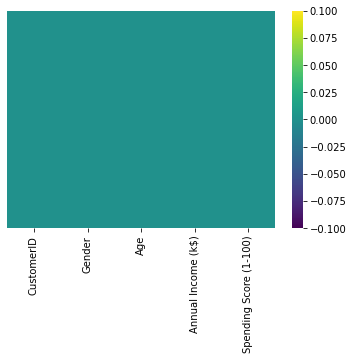

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
X=df.iloc[:,1:4]
X

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17
...,...,...,...
195,Female,35,120
196,Female,45,126
197,Male,32,126
198,Male,32,137


In [ ]:
Y=df.iloc[:,-1:]
Y

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
LR=LinearRegression()

In [ ]:
Gender=pd.get_dummies(X['Gender'])
Gender.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [ ]:
X.drop('Gender',axis=1,inplace=True)
X.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [ ]:
X=pd.concat([X,Gender],axis=1)
X.head()

,Age,Annual Income (k$),Female,Male
0,19,15,0,1
1,21,15,0,1
2,20,16,1,0
3,23,16,1,0
4,31,17,1,0


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
LR=LinearRegression()
LR.fit(X_train, Y_train)
y_pred=LR.predict(X_test)
score=r2_score(Y_test, y_pred)
score

0.025478181600746108